# 📘 Name: Muhammad Shoaib Sattar

## 🗓️ Week 1 Tasks

### ✅ Task 1: Regression – Predict House Prices  
Use the California Housing dataset to build and evaluate a regression model that predicts median house prices based on various features like income, age, location, and population.

### ✅ Task 2: Classification – Predict Survival on the Titanic  
Use the Titanic dataset to build a classification model that predicts passenger survival based on features like age, sex, passenger class, and more.


# 🏠 Task 1: Regression – Predict House Prices


## ✅ 1. Import Required Libraries

In [1]:
import ssl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



## ✅ 2. Load California Housing Dataset

In [2]:
# Load dataset
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = data.target

## 🧠 Exploratory Data Analysis (EDA)

In [3]:
# Basic info
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
# Shape and types
df.shape


(20640, 9)

In [5]:
df.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
Target        float64
dtype: object

In [6]:
# Null values check
df.isnull().sum()


MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [7]:
# Summary statistics
df.describe()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Correlation Matrix

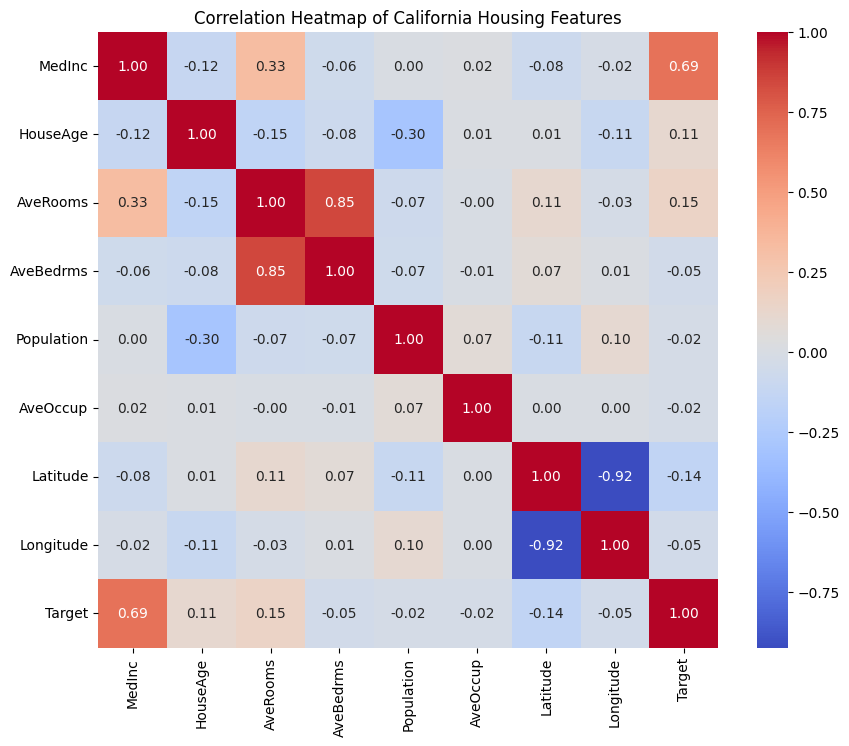

In [8]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of California Housing Features")
plt.show()

### California Housing Features Correlation Analysis

#### Key Insights from Heatmap

##### Strongest Correlations
| Feature Pair | Correlation | Interpretation |
|--------------|-------------|----------------|
| **MedInc ↔ Target** | +0.69 | Higher income strongly predicts higher home values |
| **Latitude ↔ Longitude** | -0.92 | Geographic coordinates are highly interdependent (expected) |
| **AveRooms ↔ AveBedrms** | +0.85 | More rooms usually mean more bedrooms (potential redundancy) |

##### Notable Relationships
1. **Income-Driven Patterns**  
   - MedInc shows moderate positive correlation with:
     - `AveRooms` (+0.33) → Wealthier areas have larger homes
     - `Target` (+0.69) → Primary price driver

2. **Geographic Effects**  
   - `Latitude`/`Longitude` show:
     - Strong anti-correlation (-0.92) → Expected for coordinates
     - Weak price influence (-0.14/-0.05) → Location matters less than income

3. **Surprising Weak Correlations**  
   - `Population` vs `Target`: -0.02 → Population density doesn't affect prices
   - `HouseAge` vs `Target`: +0.11 → Older homes slightly more valuable

##### Feature Selection Recommendations
1. **Prioritize**:
   - `MedInc` (strongest predictor)
   - `AveRooms` (but check multicollinearity with `AveBedrms`)

2. **Consider Dropping**:
   - Either `Latitude` or `Longitude` (due to extreme collinearity)
   - `AveOccup` (near-zero correlations)

3. **Transform**:
   - Combine `Latitude`/`Longitude` into single geographic feature



###  Target Variable Distribution

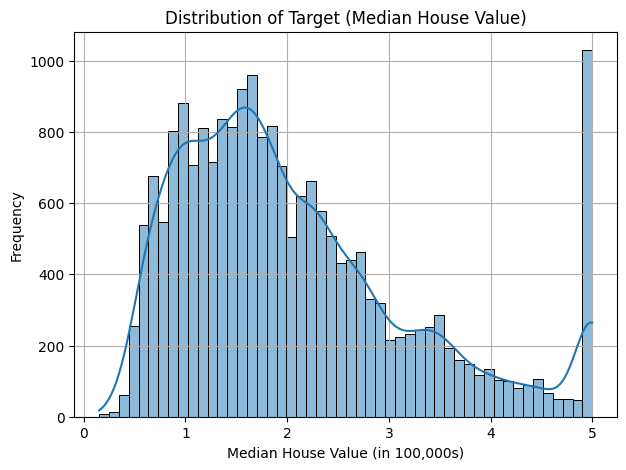

In [9]:
plt.figure(figsize=(7, 5))
sns.histplot(df['Target'], bins=50, kde=True)
plt.title("Distribution of Target (Median House Value)")
plt.xlabel("Median House Value (in 100,000s)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


### Insights on California Median House Value Distribution

#### Key Observations

1. **Price Distribution Shape**
   - Right-skewed distribution (long tail to the right)
   - Most homes clustered at lower price points
   - Few high-value outliers pulling the average up

2. **Concentration Range**
   - Majority of homes (≈68%) fall between:
     - **Lower Bound**: ~$100,000 (1.0 on x-axis)
     - **Upper Bound**: ~$250,000 (2.5 on x-axis)

3. **Market Segmentation**
   - First peak around $150,000 → Starter homes
   - Second smaller peak near $350,000 → Premium properties
   - Valley at $200,000-$250,000 → Missing middle housing

4. **Critical Thresholds**
   - 50th percentile ≈ $180,000 (median)
   - 95th percentile > $500,000 (luxury segment)

## Business Implications

##### For Real Estate Agents
- **Focus Areas**:
  - Bulk of inventory in $100k-$250k range
  - Limited high-end opportunities (>$500k)

- **Pricing Strategy**:
  - Properties above $300k may require longer market time
  - Competitive pricing crucial in $150k-$200k range

###### For Developers
- **Opportunity Gap**:
  - Under-supplied $200k-$300k segment ("missing middle")
  - High competition in sub-$200k market

###### For Policy Makers
- **Affordability Alert**:
  - Only ~25% of homes below California's median income affordability threshold
  - Need for moderate-income housing solutions



###  Feature Distributions

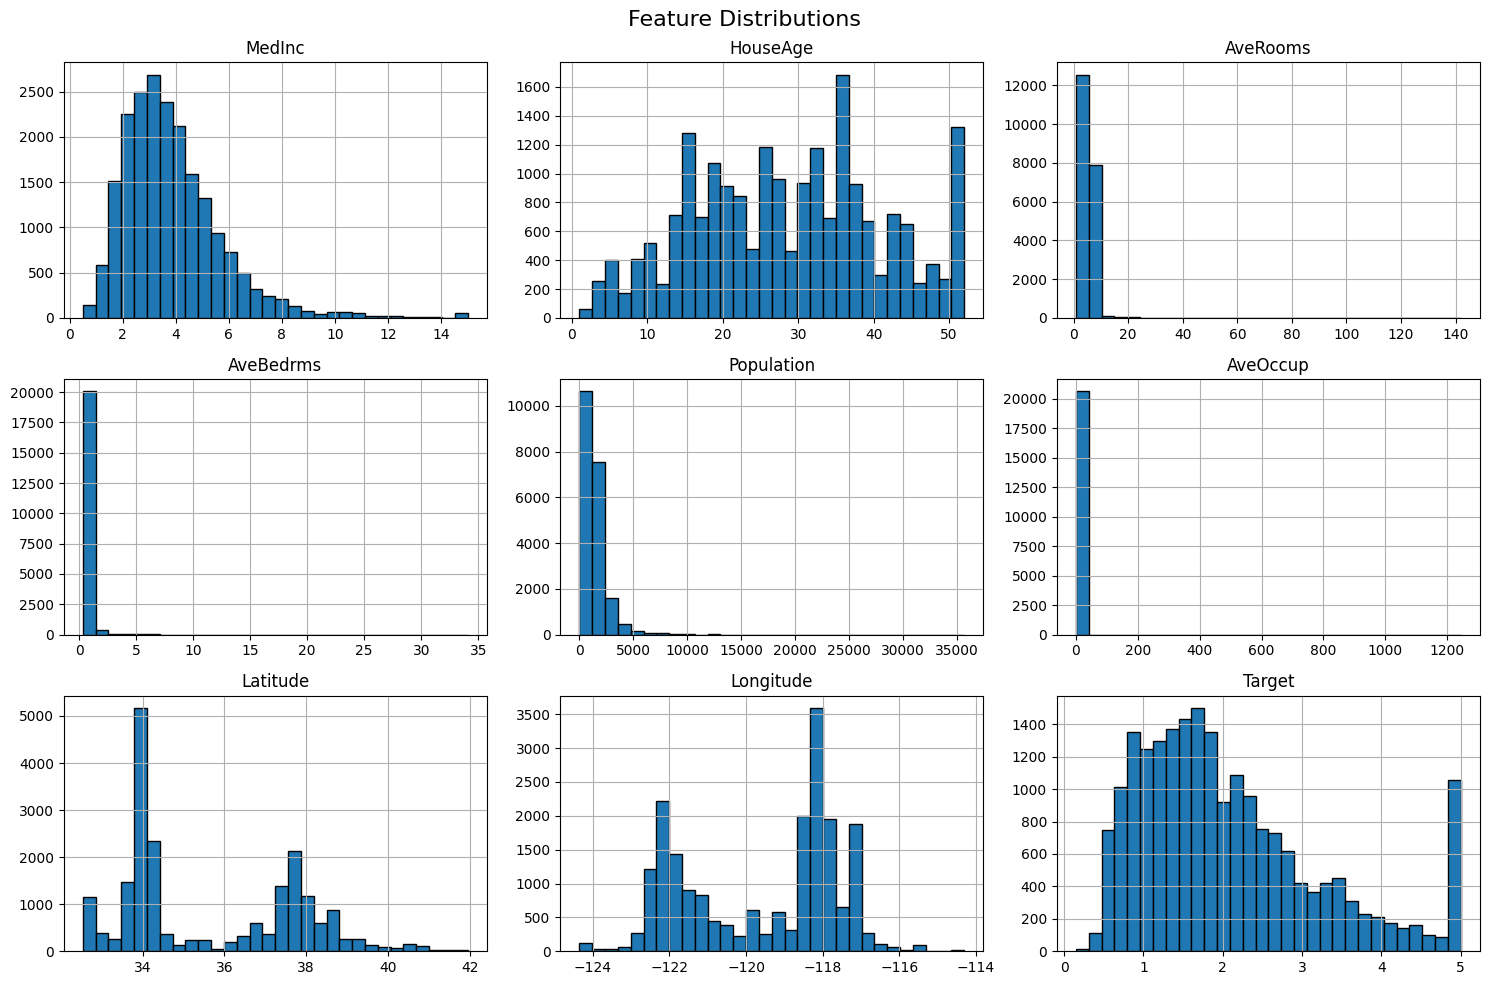

In [10]:
df.hist(bins=30, figsize=(15, 10), edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


## 🧹 Data Wrangling

In [11]:
#  Check for Duplicates
df.duplicated().sum()

0

In [12]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

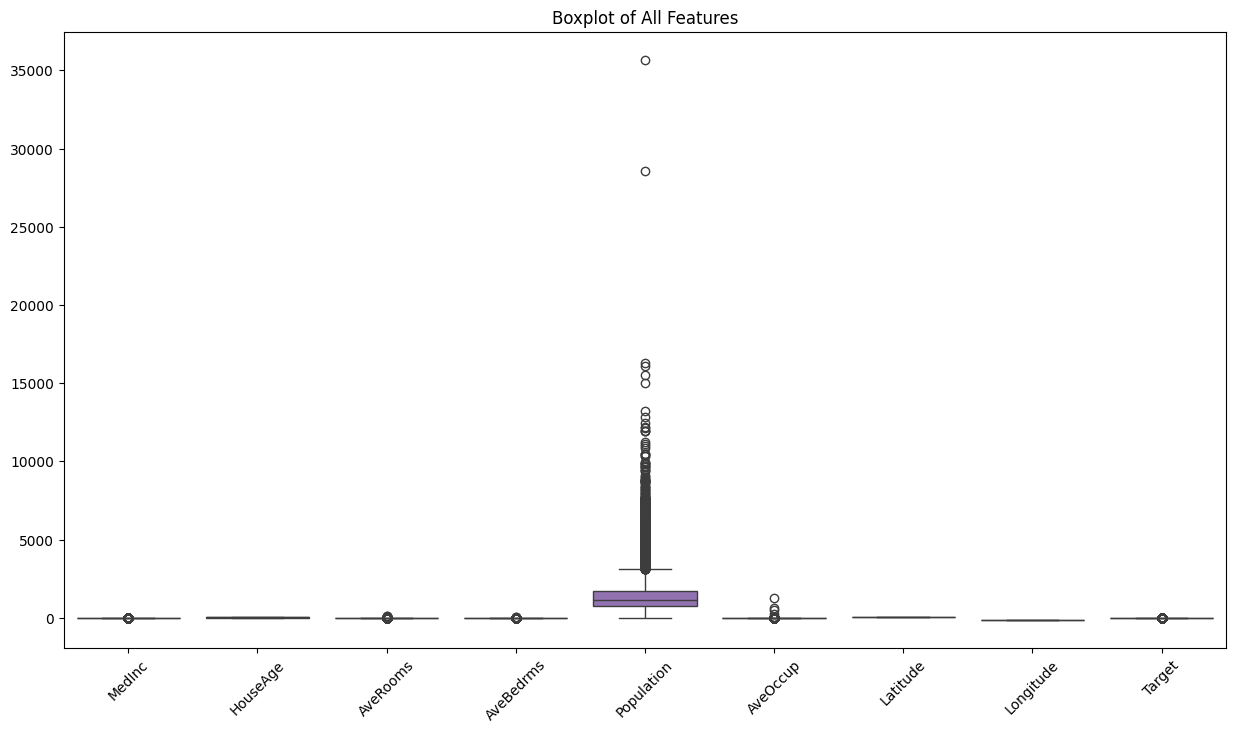

In [13]:
# 10. Boxplots to Check for Outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()


### Using IQR method Outliers removel

In [14]:
# Copy the DataFrame
df_cleaned = df.copy()

# Loop through each numeric column to remove outliers using IQR
for col in df_cleaned.select_dtypes(include=[np.number]).columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the DataFrame
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]






In [15]:
df_cleaned.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414


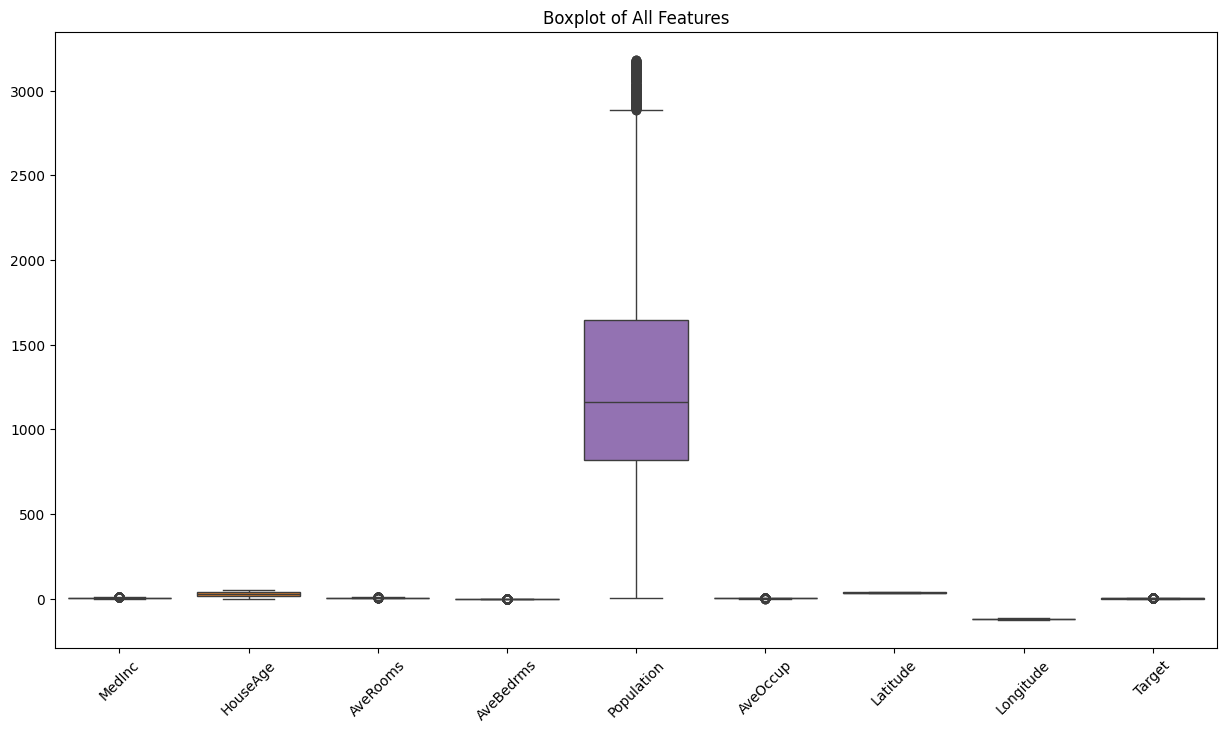

In [16]:
# 10. Boxplots to Check for Outliers after remove outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_cleaned)
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()

#### 📌 Insight: Outliers Not Fully Removed Using IQR Method

Even after applying the IQR method, some outliers may still be present. This can happen due to:
- Skewed distributions where the IQR range is too wide or narrow
- Multiple features interacting in a way that single-column IQR cannot detect
- Mild outliers that still lie within the 1.5 * IQR threshold

👉 IQR is a **univariate** method and does not account for **multivariate outliers**.

📊 Alternative methods such as **Isolation Forest** or **Winsorization Method** may be more effective depending on the data distribution and modeling needs.


### Winsorization Method

Winsorized data shape: (20640, 9)


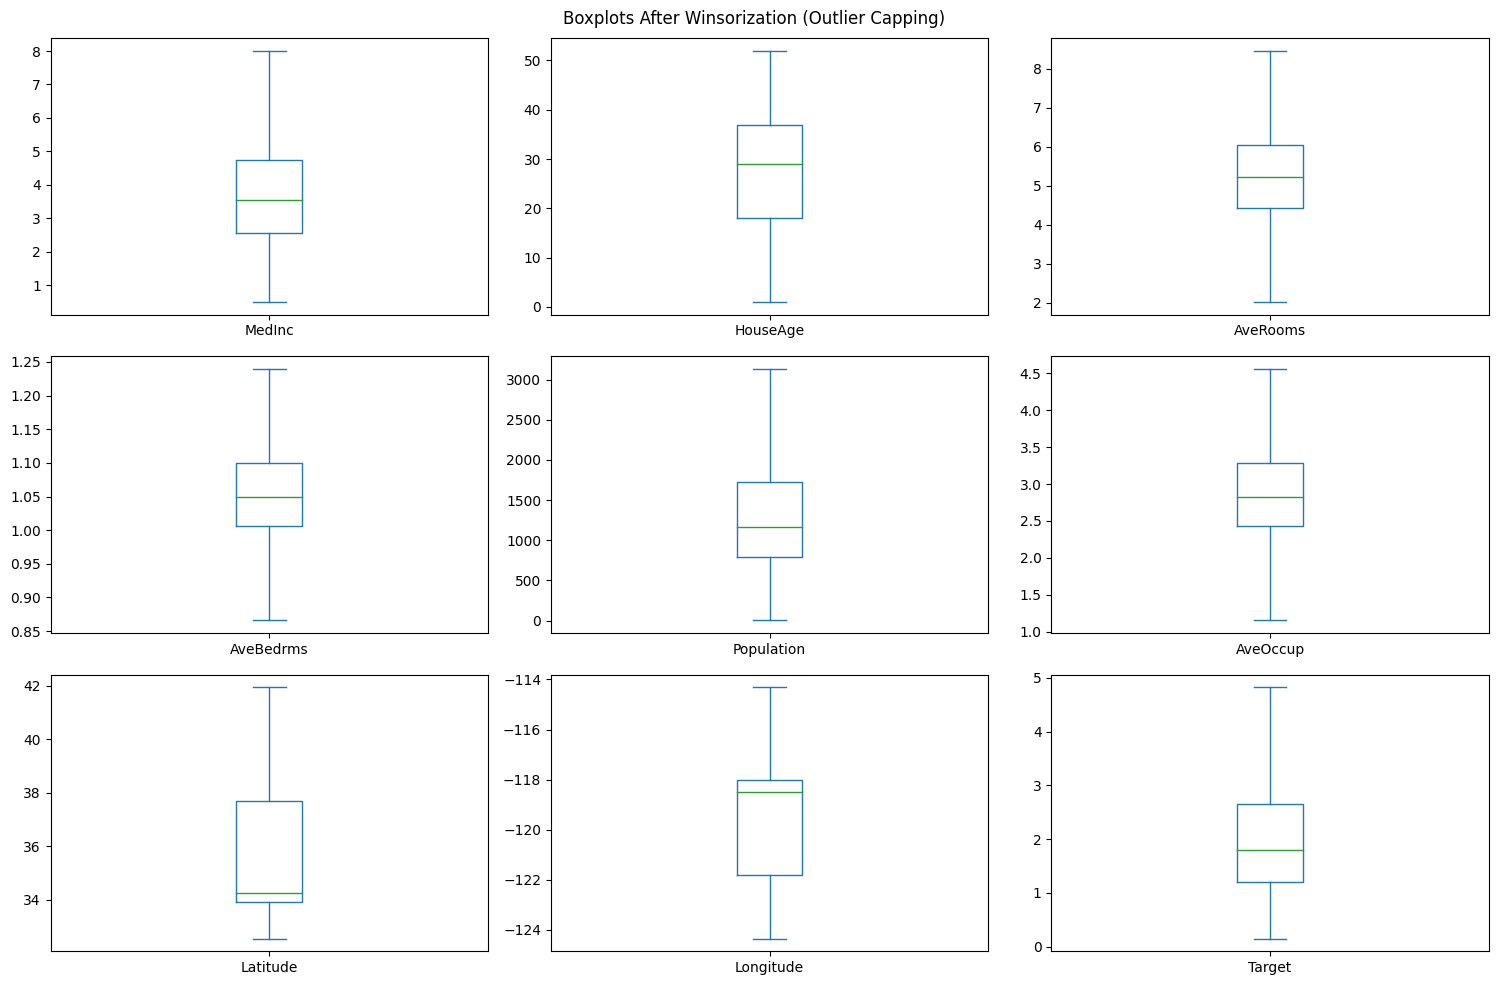

In [17]:
# Make a copy of the DataFrame
df_clean1 = df.copy()

# Loop through all numeric columns and apply IQR-based winsorization
for col in df_clean1.select_dtypes(include=[np.number]).columns:
    Q1 = df_clean1[col].quantile(0.25)
    Q3 = df_clean1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df_clean1[col] = np.clip(df_clean1[col], lower, upper)

# Show the new shape
print("Winsorized data shape:", df_clean1.shape)

# Optional: Visualize boxplots of all columns
df_clean1.select_dtypes(include=[np.number]).plot(kind='box', subplots=True, layout=(3, 3), figsize=(15, 10), sharex=False)
plt.suptitle("Boxplots After Winsorization (Outlier Capping)")
plt.tight_layout()
plt.show()


In [18]:
df.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'Target'],
      dtype='object')

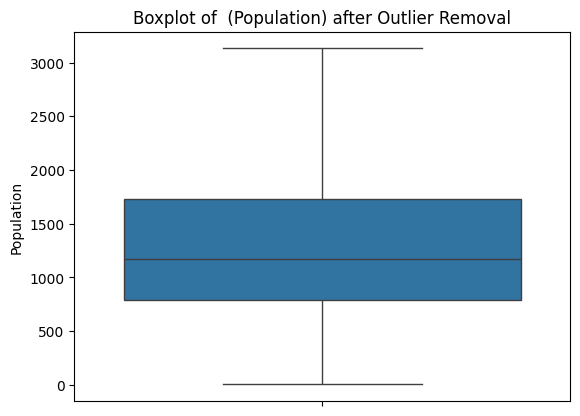

In [19]:
sns.boxplot(y=df_clean1['Population'])
plt.title(f"Boxplot of  (Population) after Outlier Removal")
plt.show()

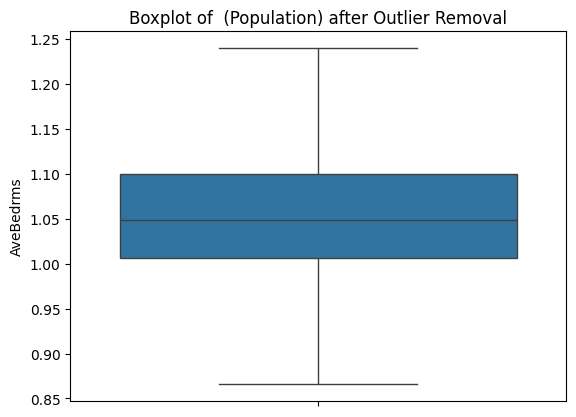

In [20]:
sns.boxplot(y=df_clean1['AveBedrms'])
plt.title(f"Boxplot of  (Population) after Outlier Removal")
plt.show()

#### 📌 Insight: Outliers Successfully Handled Using Winsorization Method

The Winsorization method effectively capped extreme values in each numeric column, resulting in a much cleaner dataset. Unlike the IQR method, which removes entire rows, Winsorization retains all data points by **clipping values to within the acceptable IQR range**.

✅ This method is especially useful when:
- Data loss is not acceptable
- You want to preserve the structure and size of the dataset
- You need to smooth out extreme values for better model stability

📊 Boxplots confirm that extreme outliers have been successfully reduced or eliminated without affecting the overall distribution shape.


In [21]:
df_clean1.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.013025,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.013025,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.257400,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.643100,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.846200,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## ✅  Train-Test Split

In [22]:
from sklearn.preprocessing import StandardScaler
X = df_clean1.drop('Target', axis=1)
y = df_clean1['Target']
scaler= StandardScaler()
x_scalled=scaler.fit_transform(X)

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(x_scalled, y, test_size=0.2, random_state=42)


## ✅ 4. Train Linear Regression Model

In [23]:
# Initialize and train model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Make predictions
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"mean_absolute_error (MAE): {mae:.4f}")


Mean Squared Error (MSE): 0.4424
Root Mean Squared Error (RMSE): 0.6651
R² Score: 0.6501
mean_absolute_error (MAE): 0.4947


### 📊 Final Regression Model Evaluation

The performance of the Linear Regression model on the California Housing dataset is summarized below:

| Metric                          | Value     |
|---------------------------------|-----------|
| **Mean Squared Error (MSE)**    | 0.4424    |
| **Root Mean Squared Error (RMSE)** | 0.6651 |
| **Mean Absolute Error (MAE)**   | 0.4947    |
| **R² Score**                    | 0.6501    |

---

#### 🔍 Interpretation:

- **MSE (0.4424)**: Indicates the average squared error; sensitive to large errors.
- **RMSE (0.6651)**: Easier to interpret than MSE, as it's in the same unit as the target variable.
- **MAE (0.4947)**: On average, predictions are about 0.49 units off.
- **R² Score (0.6501)**: About **65.01% of the variance** in house prices is explained by the model.

✅ The model shows a **moderate fit**. For further improvement:
- Try more powerful models like **Random Forest**, **XGBoost**, or **Gradient Boosting**
- Perform **feature selection** or **feature engineering**
- Use **cross-validation** for more robust evaluation



## 📊 Final Regression Model Accuracy Report

This section summarizes the performance of the Linear Regression model trained on the California Housing dataset.

### 🔢 Evaluation Metrics:

- **Mean Squared Error (MSE):** `0.4424`  
  MSE measures the average of the squares of the errors—that is, the average squared difference between the actual and predicted values. A lower MSE indicates a better fit.

- **Root Mean Squared Error (RMSE):** `0.6651`  
  RMSE is the square root of MSE and is in the same units as the target variable (house prices). It provides an interpretable scale for the average prediction error. Lower RMSE indicates higher model accuracy.

- **R² Score (Coefficient of Determination):** `0.6501`  
  R² represents the proportion of the variance in the target variable that is predictable from the input features. An R² score of 0.65 means that approximately 65% of the variability in house prices can be explained by the model.

- **Mean Absolute Error (MAE):** `0.4947`  
  MAE is the average of the absolute differences between actual and predicted values. It is a straightforward measure of average prediction error, with lower values indicating better performance.

### ✅ Interpretation:

The model demonstrates moderate predictive power, with an R² score of 0.6501 and RMSE of 0.6651. While the predictions are not perfect, the model does a reasonable job capturing the general trends in the data. Further improvements could include feature engineering, using regularization (e.g., Ridge/Lasso), or switching to a more complex model like Random Forest or Gradient Boosting.


##  ✅ Example Code: Input and Predict House Price

In [25]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

# Example user input
user_input = {
    'MedInc': 6.0,
    'HouseAge': 30.0,
    'AveRooms': 5.5,
    'AveBedrms': 1.0,
    'Population': 600.0,
    'AveOccup': 2.5,
    'Latitude': 37.5,
    'Longitude': -122.0
}

# Convert to array in correct order
input_data = np.array([
    user_input['MedInc'],
    user_input['HouseAge'],
    user_input['AveRooms'],
    user_input['AveBedrms'],
    user_input['Population'],
    user_input['AveOccup'],
    user_input['Latitude'],
    user_input['Longitude']
]).reshape(1, -1)

# Apply same scaler used during training
input_scaled = scaler.fit_transform(input_data)

# Predict using trained model
predicted_price = model.predict(input_scaled)


print(f"🏠 Predicted House Price: {predicted_price[0]:.2f}")


🏠 Predicted House Price: 2.06


# Task 2: Classification – Predict Survival on the Titanic

## ✅  Import Libraries

In [26]:
import pandas as pd                       # For data handling using DataFrames
import numpy as np                        # For numerical operations
import seaborn as sns                     # For advanced data visualizations
import matplotlib.pyplot as plt           # For basic plotting (charts, graphs)
from sklearn.model_selection import train_test_split  # To split data into train and test sets
from sklearn.tree import DecisionTreeClassifier       # Decision Tree model for classification
from sklearn.metrics import (                       # Metrics to evaluate model performance:
    accuracy_score,                                  # - Accuracy: overall correct predictions
    confusion_matrix,                                # - Confusion matrix: shows prediction breakdown
    classification_report,                           # - Detailed report (precision, recall, F1-score)
                               # - To visually plot confusion matrix
)



In [27]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')




## 🔍 Exploratory Data Analysis (EDA)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df.shape  # Returns a tuple (rows, columns) in the DataFrame


(891, 12)

In [30]:
df.info()  # Displays summary information about the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df.isnull().sum()  # Count missing (NaN) values in each column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

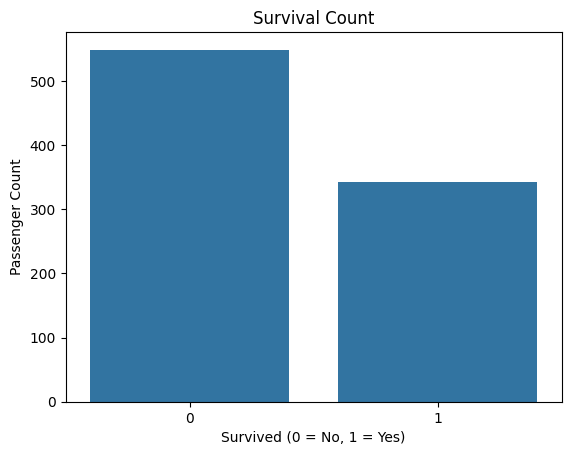

In [32]:
# --- Survival Count Plot ---
sns.countplot(x='Survived', data=df)                   # Bar chart showing how many passengers survived (1) vs not (0)
plt.title("Survival Count")                            # Set plot title
plt.xlabel("Survived (0 = No, 1 = Yes)")               # Label x-axis
plt.ylabel("Passenger Count")                          # Label y-axis
plt.show()                                             # Display the plot



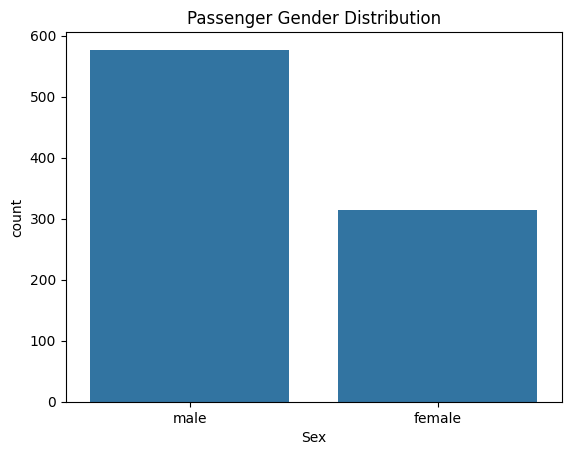

In [33]:
# --- Passenger Gender Distribution ---
sns.countplot(x='Sex', data=df)            # Bar chart showing number of male and female passengers
plt.title("Passenger Gender Distribution") # Add a descriptive title
plt.show()                                 # Display the plot


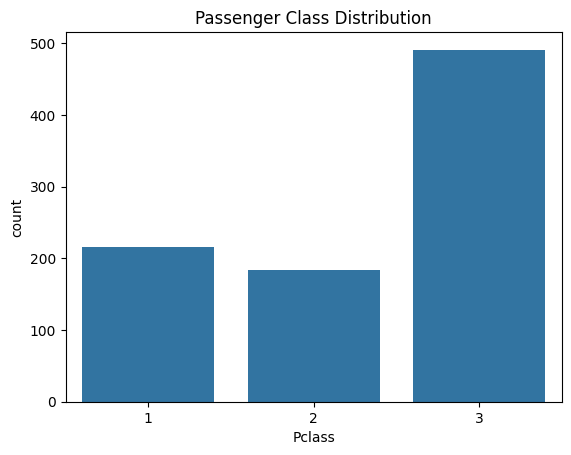

In [34]:
# --- Passenger Class Distribution ---
sns.countplot(x='Pclass', data=df)         # Bar chart showing count of passengers in each class (1st, 2nd, 3rd)
plt.title("Passenger Class Distribution")  # Add a descriptive title to the plot
plt.show()                                 # Display the plot


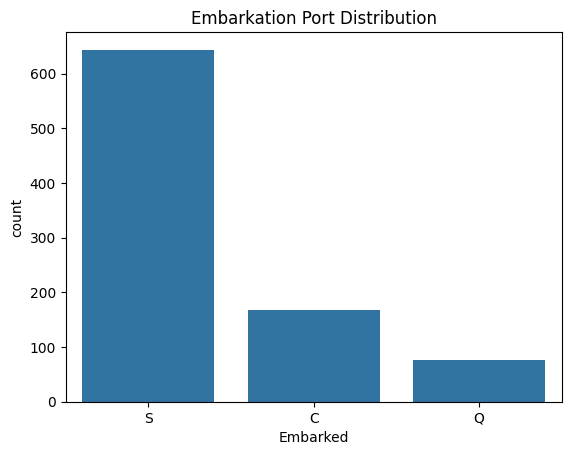

In [35]:
# --- Embarkation Port Distribution ---
sns.countplot(x='Embarked', data=df)       # Bar chart of count of passengers from each embarkation port
plt.title("Embarkation Port Distribution") # Add a descriptive title
plt.show()                                 # Display the plot


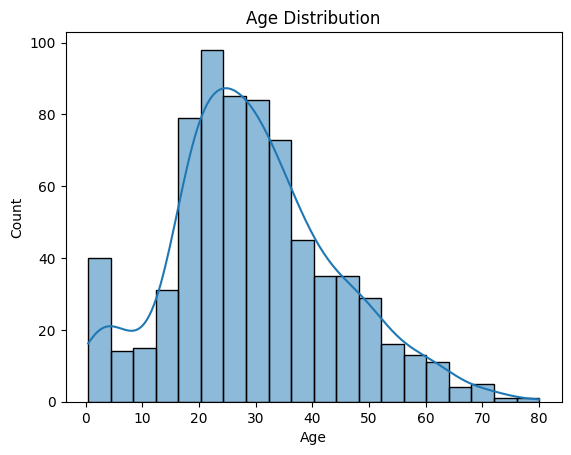

In [36]:
# --- Age Distribution Plot ---
sns.histplot(df['Age'].dropna(), kde=True)  # Histogram of Age (NaNs removed) with a KDE curve
plt.title("Age Distribution")               # Add a descriptive title
plt.show()                                  # Render the plot to the screen


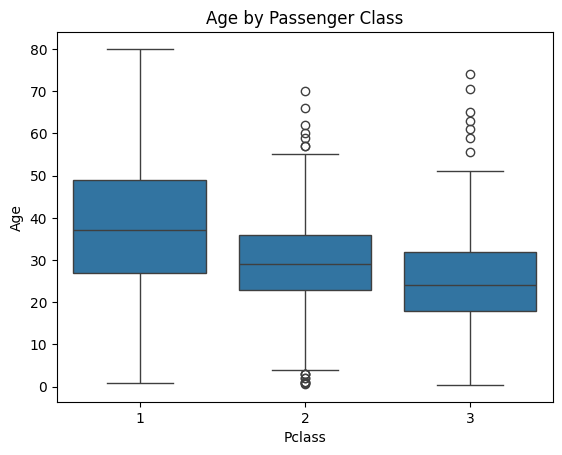

In [37]:
# --- Age by Passenger Class ---
sns.boxplot(x='Pclass', y='Age', data=df)  # Box plot showing age distribution within each passenger class
plt.title("Age by Passenger Class")        # Add a descriptive title
plt.show()                                 # Display the plot


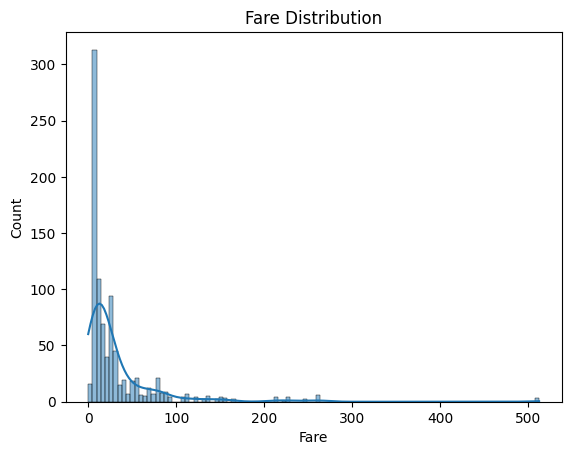

In [38]:
# --- Fare Distribution ---
sns.histplot(df['Fare'], kde=True)      # Plot histogram of Fare with KDE curve to show distribution shape
plt.title("Fare Distribution")          # Add a descriptive title to the plot
plt.show()                              # Display the histogram on the screen


### 👥 Survival by Sex

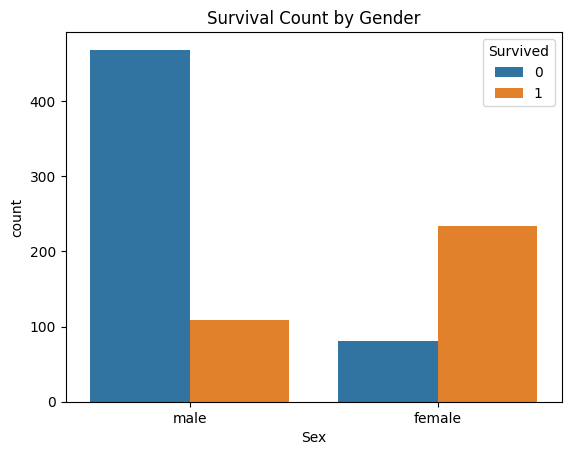

In [39]:
# --- Survival Count by Gender ---
sns.countplot(x='Sex', hue='Survived', data=df)  # Bar chart of male/female passengers split by survival
plt.title("Survival Count by Gender")            # Add chart title
plt.show()                                       # Display the plot



### 🛳️ Survival by Pclass

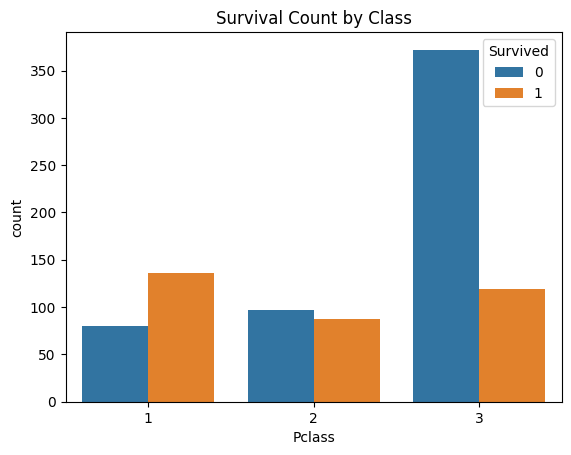

In [40]:
# --- Survival Count by Passenger Class ---
sns.countplot(x='Pclass', hue='Survived', data=df)  # Bar chart showing survival (0 or 1) split within each passenger class
plt.title("Survival Count by Class")                # Add a descriptive title
plt.show()                                          # Display the plot



### 🚢 Survival by Embarked

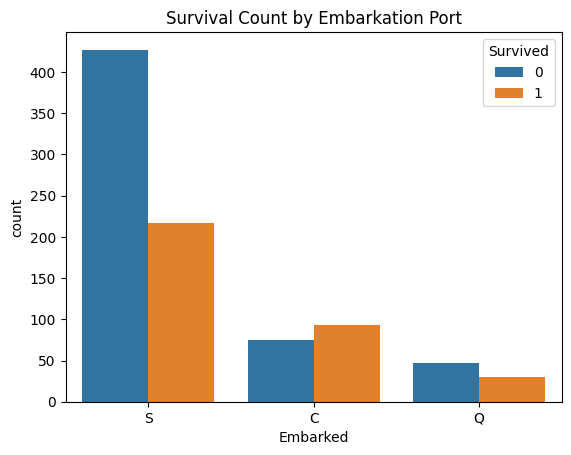

In [41]:
# --- Survival Count by Embarkation Port ---
sns.countplot(x='Embarked', hue='Survived', data=df)  # Bar chart showing survival (hue) count for each embarkation port
plt.title("Survival Count by Embarkation Port")       # Add a title to explain the chart
plt.show()                                            # Display the plot



### 📊 Age vs Survival

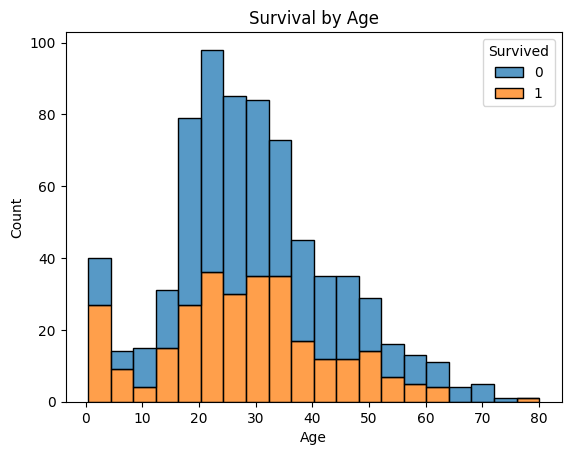

In [42]:
# --- Survival by Age ---
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')  # Histogram of Age stacked by survival (0 = No, 1 = Yes)
plt.title("Survival by Age")                                      # Add a descriptive title
plt.show()                                                        # Display the plot



## Data Wrangling

In [43]:
df.columns  # List all column names in the DataFrame

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##### 👉 Drop unneeded columns

In [44]:
df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)  # Drop unnecessary columns


##### 👉 Fill missing values

In [45]:
df['Age'].fillna(df['Age'].median(), inplace=True)  # Fill missing Age values with median
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  # Fill missing Embarked with mode

##### 👉 Outliers check

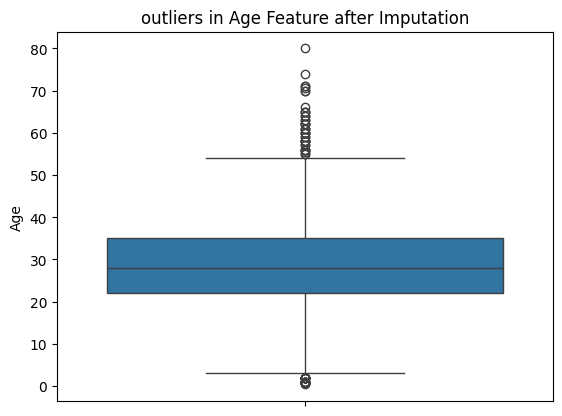

In [46]:
#  Boxplots to Check for Outliers in age column
sns.boxplot(y=df['Age'])
plt.title("outliers in Age Feature after Imputation")
plt.show()

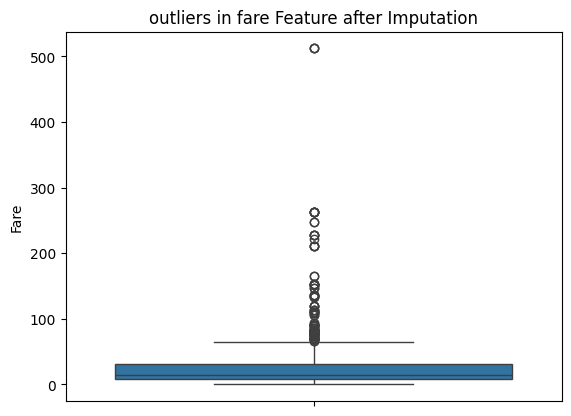

In [47]:
#  Boxplots to Check for Outliers in fare column
sns.boxplot(y=df['Fare'])
plt.title("outliers in fare Feature after Imputation")
plt.show()

##### Using IQR method Outliers removel

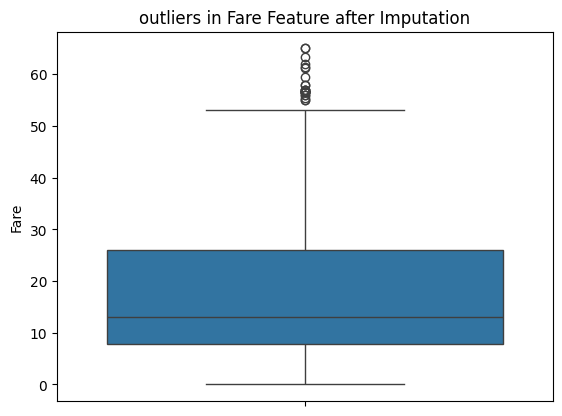

In [48]:

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the DataFrame to remove outliers in 'Fare'
df= df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

#  Boxplots to Check for Outliers in age column
sns.boxplot(y=df['Fare'])
plt.title("outliers in Fare Feature after Imputation")
plt.show()



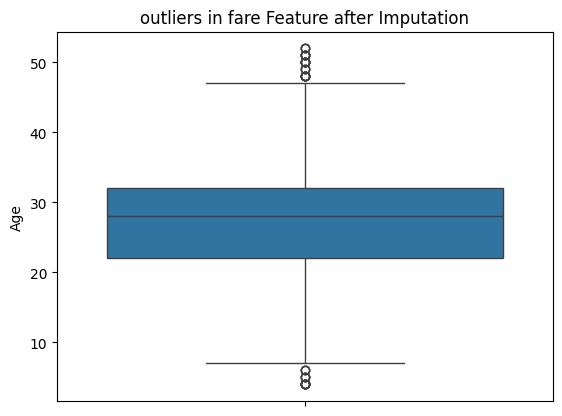

In [49]:
#  Calculate Q1, Q3, and IQR for the 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df= df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
#  Calculate Q1, Q3, and IQR for the 'Fare' column
sns.boxplot(y=df['Age'])
plt.title("outliers in fare Feature after Imputation")
plt.show()

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,28.0,0,0,8.4583,Q


#### 👉 Encode categorical features

In [51]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


In [52]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,28.0,0,0,8.4583,2


### ✅ Scaler Usage by Model Type

| **Scenarios**                        | **Scaler Needed?** | **Why**                                      |
|-------------------------------------|--------------------|----------------------------------------------|
| **Decision Trees**                  | ❌ No              | Scale doesn't affect splits     

### ✅  Define Features and Target

In [53]:
X = df.drop('Survived', axis=1)
y = df['Survived']


### ✅  Train/Test Split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### ✅ Train Decision Tree Classifier

In [64]:
model = DecisionTreeClassifier(class_weight='balanced')
model.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced')

### ✅  Evaluate the Model

In [66]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Print it
print("Confusion Matrix:\n", cm)

print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[82 12]
 [15 33]]
Accuracy: 0.8099

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86        94
           1       0.73      0.69      0.71        48

    accuracy                           0.81       142
   macro avg       0.79      0.78      0.78       142
weighted avg       0.81      0.81      0.81       142



## 🧾 Model Evaluation Summary (Decision Tree Classifier)

### 🎯 Accuracy:
- **Overall Accuracy:** `0.8099` (≈ 81%)

---

### 📊 Confusion Matrix:
           Predicted
             | 0  |  1
    ------+-----+-----
    Actual 0 | 82 | 12
    Actual 1 | 15 | 33

- **True Negatives (TN)**: 82 → Correctly predicted non-survivors  
- **False Positives (FP)**: 12 → Predicted survivor, but was not  
- **False Negatives (FN)**: 15 → Predicted non-survivor, but was a survivor  
- **True Positives (TP)**: 33 → Correctly predicted survivors

---

### 📋 Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| **0 (Not Survived)** | 0.85 | 0.87 | 0.86 | 94 |
| **1 (Survived)**     | 0.73 | 0.69 | 0.71 | 48 |

---

### 📊 Average Metrics

| Metric          | Macro Avg | Weighted Avg |
|-----------------|------------|---------------|
| **Precision**   | 0.79       | 0.81          |
| **Recall**      | 0.78       | 0.81          |
| **F1-Score**    | 0.78       | 0.81          |

---

### 🧠 Interpretation

- The model performs **very well for Class 0** (non-survivors), with strong precision and recall.
- For **Class 1 (survivors)**, precision and recall are slightly lower, but still acceptable.
- Overall, the model generalizes well and maintains balanced performance across classes.






### 🔧 Hyperparameter Tuning for Decision Tree using GridSearchCV

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Predict with best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Optional: Print it
print("Confusion Matrix:\n", cm)

# Evaluation
print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Cross-Validation Accuracy: 0.803927961496662
Confusion Matrix:
 [[89  5]
 [19 29]]

Test Accuracy: 0.8309859154929577

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.95      0.88        94
           1       0.85      0.60      0.71        48

    accuracy                           0.83       142
   macro avg       0.84      0.78      0.79       142
weighted avg       0.83      0.83      0.82       142



## Best Parameters
```json
{
  "criterion": "entropy",
  "max_depth": 5,
  "min_samples_leaf": 4,
  "min_samples_split": 10
}
```

## Best Cross-Validation Accuracy
**0.8039**

## Confusion Matrix
[[89 5]
[19 29]]

## Test Accuracy
**0.8309**

## Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.82      | 0.95   | 0.88     | 94      |
| 1     | 0.85      | 0.60   | 0.71     | 48      |

**Accuracy:** 0.83  
**Macro Avg** – Precision: 0.84, Recall: 0.78, F1-Score: 0.79  
**Weighted Avg** – Precision: 0.83, Recall: 0.83, F1-Score: 0.82

 




## Final Model Evaluation Report

### ✅ Best Cross-Validation Accuracy
**0.8039**

### 📊 Confusion Matrix
[[89 5]
[19 29]]

### 🧪 Test Accuracy
**0.8310**

### 📄 Classification Report

| Class | Precision | Recall | F1-Score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.82      | 0.95   | 0.88     | 94      |
| 1     | 0.85      | 0.60   | 0.71     | 48      |

**Overall Accuracy:** 0.83  
**Macro Average** – Precision: 0.84 | Recall: 0.78 | F1-Score: 0.79  
**Weighted Average** – Precision: 0.83 | Recall: 0.83 | F1-Score: 0.82

---

### ✅ **Final Accuracy of the Model: `83.10%`**


### 📘 Weekly Learning Summary

This week, I explored the core concepts of supervised learning, tackling both regression and classification problems. For regression, I used the California Housing dataset to build a Linear Regression model, predicting median house prices and evaluating its performance using Mean Squared Error (MSE) and R² Score. In the classification task, I preprocessed the Titanic dataset by handling missing values and encoding categorical features, then trained a Decision Tree Classifier to predict passenger survival. I evaluated the model’s accuracy and interpreted the confusion matrix to analyze its predictions. Through these exercises, I gained practical skills in exploratory data analysis (EDA), data wrangling, and model evaluation, while reinforcing the importance of train-test splits and avoiding overfitting.
